Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399

### AP1  de Mineração de Dados
### Universidade FEderal do Ceará
### Profa. Lívia Almada

### Instruções

*   Preencha seus dados 
*    Renomeei o arquivo do seu notebook para o seguinte formato <nome_completo>_<matricula>_AP1_Mineracao_de_Dados
*   Envie o notebook com a solução da prova até às 12h da manhã do dia 09/07/2021 pela página do Moodle da disciplina.
*   Ao enviar o arquivo da você atesta que a  solução é exclusivamente sua. Plágio e cópias não serão tolerados.



Para a avaliação vamos utilizar o **Student Performance Data Set**, que contém dados sobre estudantes e notas na disciplina de matemática. Você pode encontrar uma descrição do dataset em https://archive.ics.uci.edu/ml/datasets/Student+Performance. O dataset a ser utilizado está disponível no link do Moodle.


**Q2) Agora que você já tem as classes definidas, vamos trabalhar neste dataset como um problema de classificação. Para esta etapa considere todos os atributos, exceto os utilizados para definir a classe.**

a) Divida o dataset usando  75% dos dados para treino e 25% dos dados para teste com divisão feita com estratificação na classe. Atribua 42 ao valor do random state.

b) Utilize uma árvore de decisão, com critério de particionamento 'entropy', defina como tamanho máximo para altura da sua árvore o valor 15. Atribua 42 ao valor do random state.

c) Mostre a matriz de confusão. Mostre a precisão, recall e f1-measure de cada classe e a acurácia do modelo treinado.

d) Discuta os resultados. Alguma das classes foi mais fácil de prever? Alguma classe foi mais difícil de prever? O que você poderia fazer para melhorar o modelo, argumente?

**Q3) Para essa questão vamos utilizar novamente o valor original de variável target G3 e apenas atributos numéricos.**

a) Divida o dataset em treino e teste usando holdout 75/25. No caso em que a normalização dos atributos é justificavél, aplique a normalização para que todas as veriáveis descritoras tenham desvio padrão 1 e média 0. Lembre-se de "ajsutar" (fit) a normalização usando apenas a parte dos dados que vai treinar o modelo.

b) Treine um modelo de regressão linear com SGD no dataset de treino, usando o máximo de iterações igual a 100 épocas.  Altere a taxa inicial de aprendizagem para 0.005. Teste o dataset e obtenha os valores das métricas Média do Erro Absoluto, Média do Erro quadrático e a Raiz Quadrada da Média Erro Quadrático. O que você pode afirmar sobre a qualidade do modelo obtido com base nesses valores. 

c) Plot um grafico onde o eixo horizontal é o valor esperado e o eixo verical é o valor predito. O que esse gráfico significa?



In [107]:
# importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# modelos utilizados
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor

**Q1) Primeiramente considere apenas os atributos G1, G2 e G3. Eles são atributos numéricos que especificam:**
*  G1 - nota do período 1 
*  G2 - nota do período 2 
*  G3 - nota final 

**Uma maneira de tratar esse problema, é discretizar o atributo de classe. Existem diferentes formas de discretizar. Nessa questão, você deve utilizar os atributos G1, G2 e G3 para clusterizar o dataset e assim formar diferentes classes de alunos, que serão correspondentes aos clusters encontrados. Nesta questão você vai utilizar o algoritmo k-means para aplicar a clusterização usando apenas os atributos G1, G2 e G3 e identificar possíveis classes neste problema.**


a) Primeiramente, mostre a distribuição dos atributos G1, G2 e G3. Como você justificaria a utilização, ou não, da normalização/escalonamento de atributos para esta tarefa com base no valor dos atributos? No caso em que a normalização dos atributos é justificavél, aplique a normalização entre 0 e 1. 

**Justificativa**: Não faço uso de escalonamento pois as faixas de valores das features são a mesma.

In [108]:
# leitura dos dados
df = pd.read_csv('student-mat.csv', sep=';')

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [109]:
df.shape

(395, 33)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [111]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


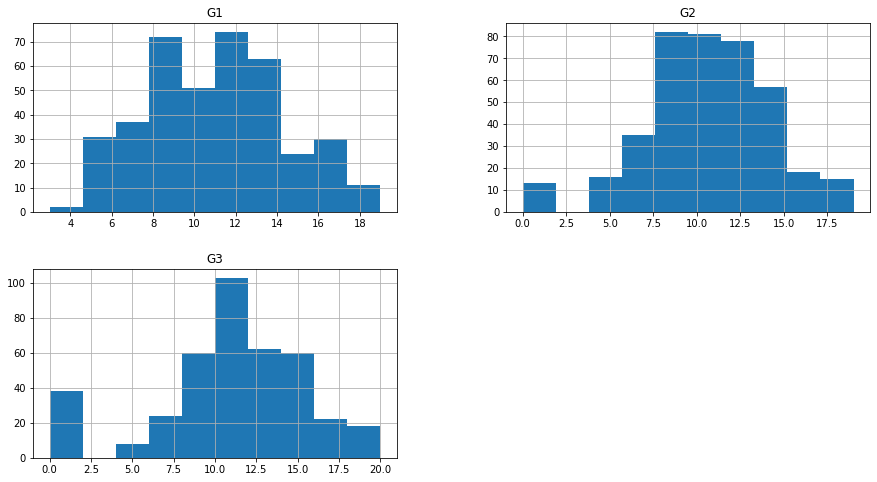

In [112]:
# distribuição dos valores das notas
df[['G1', 'G2', 'G3']].hist(figsize=(15, 8));

b) Note que o número de classes é desconhecido. Portanto, aplique a clusterização e escolha o valor de k com base no critério do método do cotovelo. Apresente o gráfico da inércia e mostre o valor de k escolhido explicando o critério de escolha.

In [113]:
X = df[['G1', 'G2', 'G3']].values
inercia = []
min_k = 2
max_k = 15
range_ = list(range(2, max_k+1))
for k in range_:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

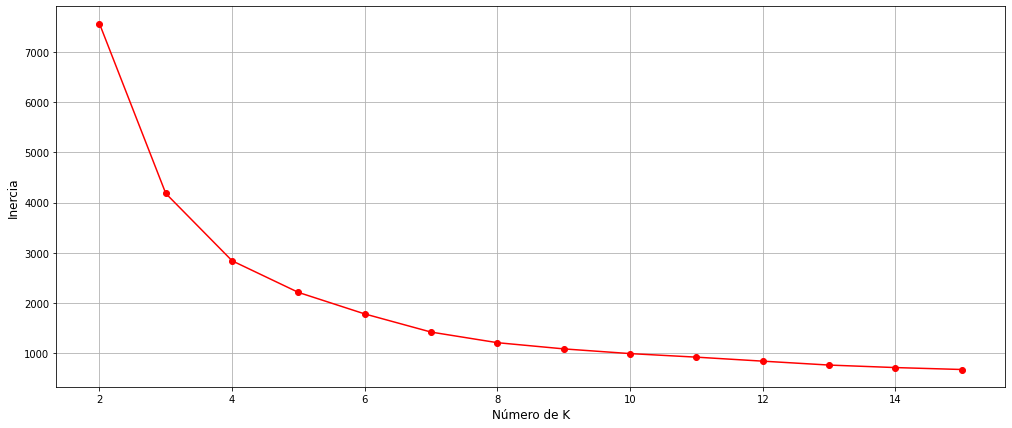

In [114]:
plt.figure(figsize=(17, 7))
plt.grid()
plt.plot(range_, inercia, '-o', color='red');
plt.ylabel('Inercia', fontsize=12)
plt.xlabel('Número de K', fontsize=12);

É escolhido o valor de K = 4, sendo esse o valor correpondente o valor da inercia começa a achatar, onde tem a
diminiuição no valor da inercia, outros valores que poderiam ser escolhidos: [5,6,7,8]

In [115]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
kmeans.labels_

array([1, 1, 1, 3, 1, 3, 0, 1, 3, 3, 1, 0, 3, 0, 3, 3, 0, 1, 2, 1, 3, 3,
       3, 0, 1, 1, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 3, 3, 0, 0, 1, 0, 3, 1,
       1, 1, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1, 3, 3, 1, 3, 0, 1, 1, 1, 1, 3,
       0, 1, 1, 3, 3, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 3, 1, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 3, 0, 1, 3, 0, 1, 3, 0, 3,
       3, 1, 0, 3, 1, 3, 0, 0, 1, 0, 3, 3, 0, 0, 1, 0, 1, 1, 2, 3, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 3, 2, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2,
       0, 1, 0, 1, 3, 0, 2, 1, 2, 1, 1, 0, 1, 3, 2, 3, 2, 3, 0, 2, 1, 1,
       0, 1, 1, 0, 1, 0, 3, 1, 0, 0, 0, 3, 1, 1, 0, 1, 1, 1, 0, 3, 3, 1,
       3, 1, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 2, 1, 1, 1,
       1, 2, 3, 0, 0, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 3, 0, 1, 2, 3, 1, 1, 1, 1, 0, 1, 0, 0, 3, 2, 3, 1, 0, 1,
       2, 3, 1, 0, 1, 2, 1, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 2, 1, 0, 3, 0,

c) Finalmente, atribua a cada instância de dados a classe correspondente ao cluster. Mostre a quantidade de instâncias em cada classe.

In [116]:
df['class'] = kmeans.labels_
df['class'].value_counts()

1    135
0    135
3     81
2     44
Name: class, dtype: int64

### Questão 02
**Q2) Agora que você já tem as classes definidas, vamos trabalhar neste dataset como um problema de classificação. Para esta etapa considere todos os atributos, exceto os utilizados para definir a classe.**


a) Divida o dataset usando  75% dos dados para treino e 25% dos dados para teste com divisão feita com estratificação na classe. Atribua 42 ao valor do random state.

In [118]:
# features do tipo  string
columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet','romantic']

In [119]:
# método que será utilizado para conversão de string -> inteiro
class_le = LabelEncoder() 

In [120]:
# conversão
for feature in columns:
    df[feature] = class_le.fit_transform(df[feature].values)

In [121]:
# verificação dos dados
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,1
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,1
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,3
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,1


In [122]:
# divisão dos dados em dados de treino e teste
X = df.iloc[:, :30].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

b) Utilize uma árvore de decisão, com critério de particionamento 'entropy', defina como tamanho máximo para altura da sua árvore o valor 15. Atribua 42 ao valor do random state.

In [123]:
# instanciação 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

# treino do modelo
tree.fit(X_train, y_train)

# predição dos valores do alvo
y_pred = tree.predict(X_test)


c) Mostre a matriz de confusão. Mostre a precisão, recall e f1-measure de cada classe e a acurácia do modelo treinado.

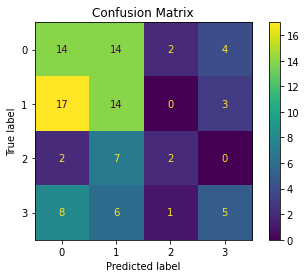

In [124]:
# plotagem da matriz de confusão 
metrics.plot_confusion_matrix(tree, X_test, y_test);
plt.title('Confusion Matrix');

In [125]:
# métricas de avaliação
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.41      0.37        34
           1       0.34      0.41      0.37        34
           2       0.40      0.18      0.25        11
           3       0.42      0.25      0.31        20

    accuracy                           0.35        99
   macro avg       0.37      0.31      0.33        99
weighted avg       0.36      0.35      0.35        99



d) Discuta os resultados. Alguma das classes foi mais fácil de prever? Alguma classe foi mais difícil de prever? O que você poderia fazer para melhorar o modelo, argumente?

**Resposta**

Classes 0 e 1 são mais fáceis de se identificar.
Classe 2 teve a pior recall.

Para melhorar o modelo pode-se utilizar primeiramente de um escalonamento e melhorar os hyperparâmetros do modelo

**Q3) Para essa questão vamos utilizar novamente o valor original de variável target G3 e apenas atributos numéricos.**

a) Divida o dataset em treino e teste usando holdout 75/25. No caso em que a normalização dos atributos é justificavél, aplique a normalização para que todas as veriáveis descritoras tenham desvio padrão 1 e média 0. Lembre-se de "ajsutar" (fit) a normalização usando apenas a parte dos dados que vai treinar o modelo.

b) Treine um modelo de regressão linear com SGD no dataset de treino, usando o máximo de iterações igual a 100 épocas.  Altere a taxa inicial de aprendizagem para 0.005. Teste o dataset e obtenha os valores das métricas Média do Erro Absoluto, Média do Erro quadrático e a Raiz Quadrada da Média Erro Quadrático. O que você pode afirmar sobre a qualidade do modelo obtido com base nesses valores. 

c) Plot um grafico onde o eixo horizontal é o valor esperado e o eixo verical é o valor predito. O que esse gráfico significa?


In [126]:
std_scaler = StandardScaler()

In [127]:
X = df.iloc[:, :-2].values
y = df.iloc[:, -2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

In [129]:
sgd_reg = SGDRegressor(max_iter=100, eta0=0.005)
sgd_reg.fit(X_train, y_train)
y_predict = sgd_reg.predict(X_test)

In [130]:
# métricas
print(f'MAE: {metrics.mean_absolute_error(y_test, y_predict)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_predict)}')
print(f'RMSE: {metrics.mean_squared_error(y_test, y_predict, squared=False)}')

MAE: 1.414830429235739
MSE: 4.6230096505881635
RMSE: 2.1501185201258473


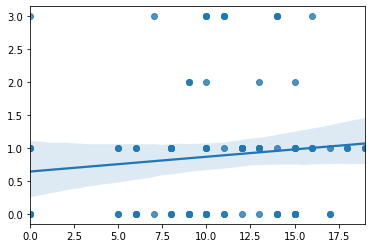

In [131]:
sns.regplot(y_test, y_pred)

As métricas avaliativas tiveram um bom resultado